# Titanic - Machine Learning from Disaster

O Desafio se trata da construção de um modelo preditivo que busca prever
a probabilidade de uma pessoa sobreviver ao titanic baseado em dados dos
passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).

Os dados de submisão serão esperados 2 colunas:

    * PassengerId (classificado em qualquer ordem)
    * Sobreviveu (contém suas previsões binárias: 1 para sobreviveu, 0 para falecido)



# Como os dados se encontram :

    PassengerId: Indentificação dos passageiros >  
    Survived	
        sobreviveu s=1 ou n=0                      
    Pclass	
        classe do bilete
            1 = alta  basicamente rico
            2 = media classe media 
            3 = baixa classe baixa (eu)
    Name: nome dos passageiros
    Sex:  genero
    Age:  idade
    SibSp: irmaos ou conjugues
    Parch: pais ou filhos	
    Ticket: numero do bilhete	
    Fare: tarifa do passageiro	
    Cabin: cabine
    Embarked: porto de embarque

    Tipos

    Numericos:
        Discretos:
            Pclass
            Parch
            SibSp
        
        Continua:
            Age
            Fare

        Dado Objetivo:
            Survived

        Id:
            PassengerId

    Categoricas:
        Name
        Sex
        Ticket
        Cabin 
        Embarke


# Importando as Bibliotecas

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



%matplotlib inline

In [13]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

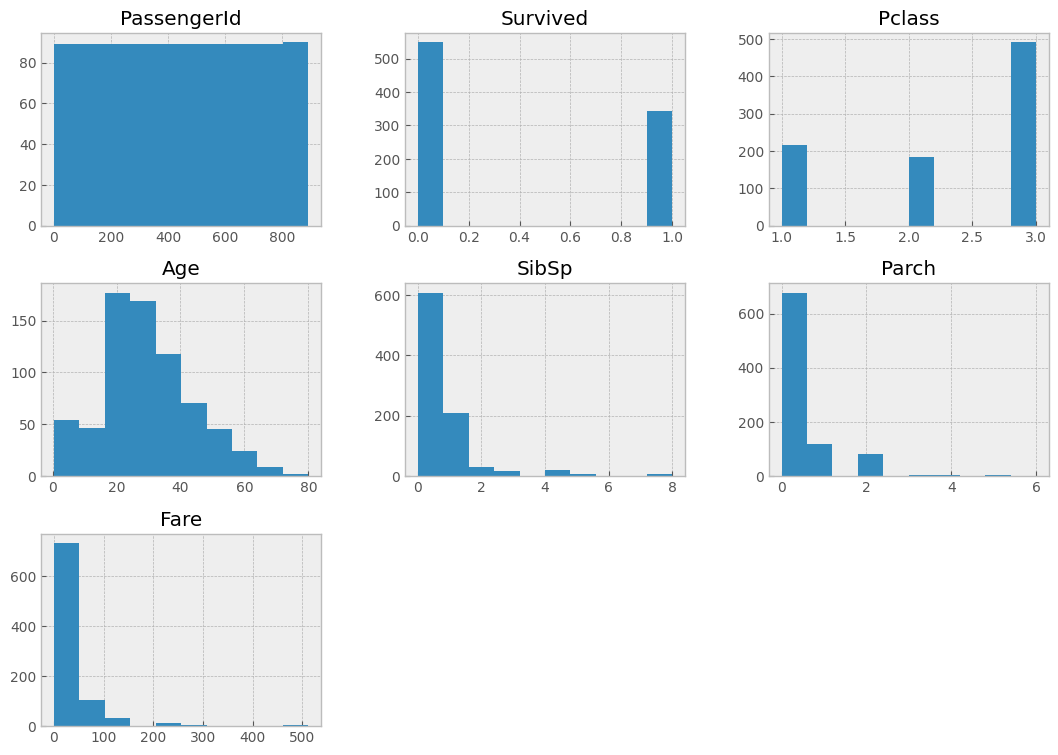

In [19]:
plt.style.use('bmh')
df_train.hist(figsize=(13,9))

In [66]:
print('Quantia de Homens e Mulheres que sobreviveram:')
display(df_train[['Sex', 'Survived']].groupby('Sex').sum())

print('Porcentagem de Homens e Mulheres que sobreviveram:')
display(df_train[['Sex', 'Survived']].groupby('Sex').mean())

Quantia de Homens e Mulheres que sobreviveram:


,Survived
Sex,
female,233
male,109


Porcentagem de Homens e Mulheres que sobreviveram:


,Survived
Sex,
female,0.742038
male,0.188908


Aparentemente 'As mulheres e crianças primeiro' prevaleceu não e mesmo. 

In [52]:
len(df_train[df_train['Sex'] == 'female'])

314

<Axes: xlabel='Survived', ylabel='Count'>

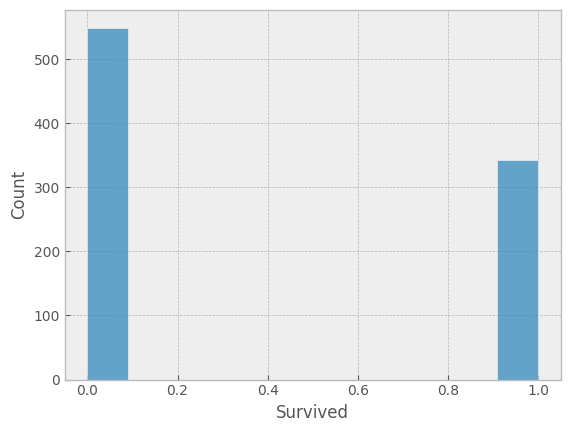

In [24]:
sns.histplot(df_train, x='Survived')